# 1. Import the necessary libraries (2 marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
%matplotlib inline

# 2. Read the data as a data frame (2 marks)

In [2]:
df = pd.read_csv('Insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# 3)a)  Shape of the data (2 marks)

In [3]:
df.shape

(1338, 7)

# 3b. Data type of each attribute

In [4]:
df.dtypes
#df.info()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 3c) Checking the presence of missing values (3 marks)

In [7]:
df.isnull().sum()
# There are no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 3d. 5 point summary of numerical attributes (3 marks)

In [8]:
 df.describe().transpose()
# max, min, 25%, 50%, 75%, are the 5 points 

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

# 3e: Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks

In [9]:
num_cols = ['age','bmi','charges']
num_cols

['age', 'bmi', 'charges']

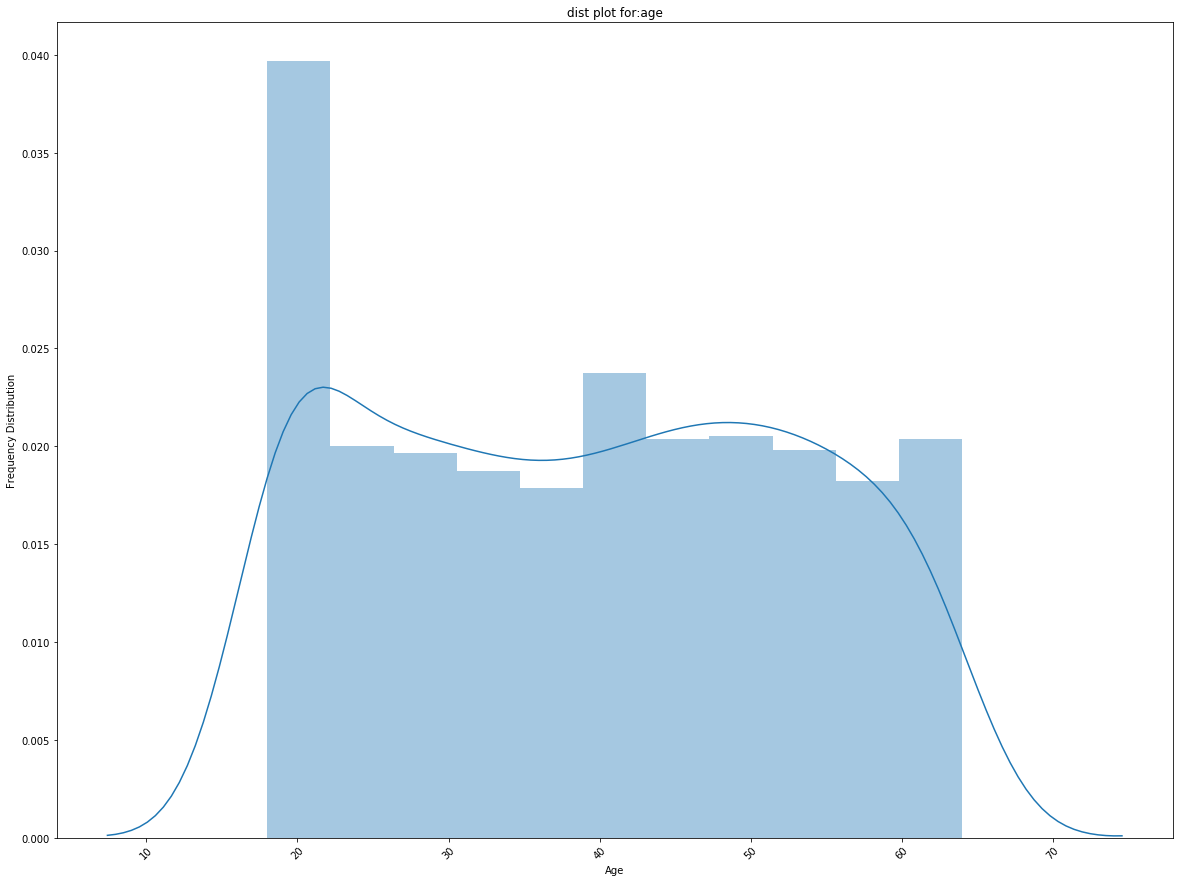

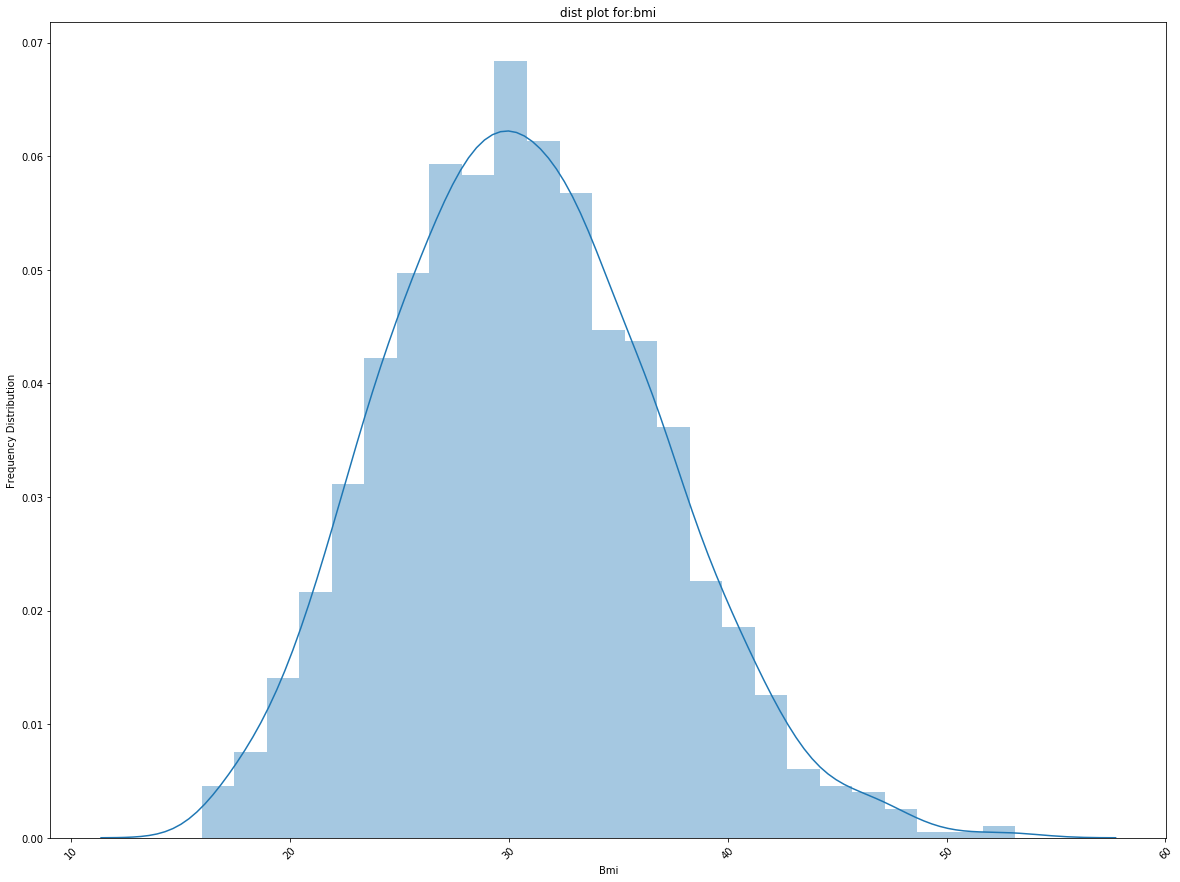

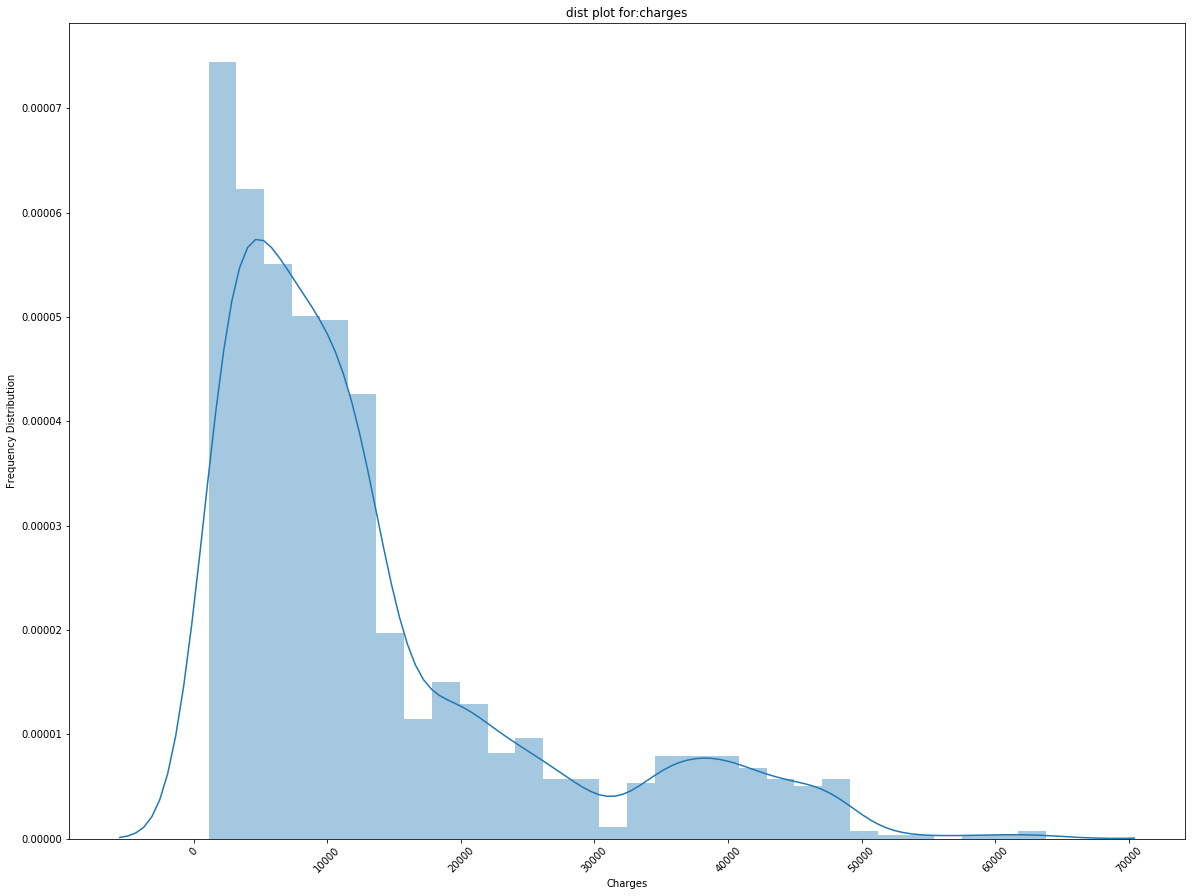

In [10]:

for num in num_cols:
    plt.figure(figsize=(20,15))
    sns.distplot(df[num])
    plt.xlabel(num.capitalize())
    plt.ylabel('Frequency Distribution')
    plt.title("dist plot for:" +num)
    plt.savefig("Distplot/distplot For {}.jpg".format(num.capitalize()), dpi =100, bbox_tight = True)
    plt.xticks(rotation = 45)
    
    


# 3f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

In [11]:
df_skew = df[['age','charges','bmi']]

In [12]:
df_skew.skew(axis = 0, skipna = True) 

age        0.055673
charges    1.515880
bmi        0.284047
dtype: float64

# 3g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)

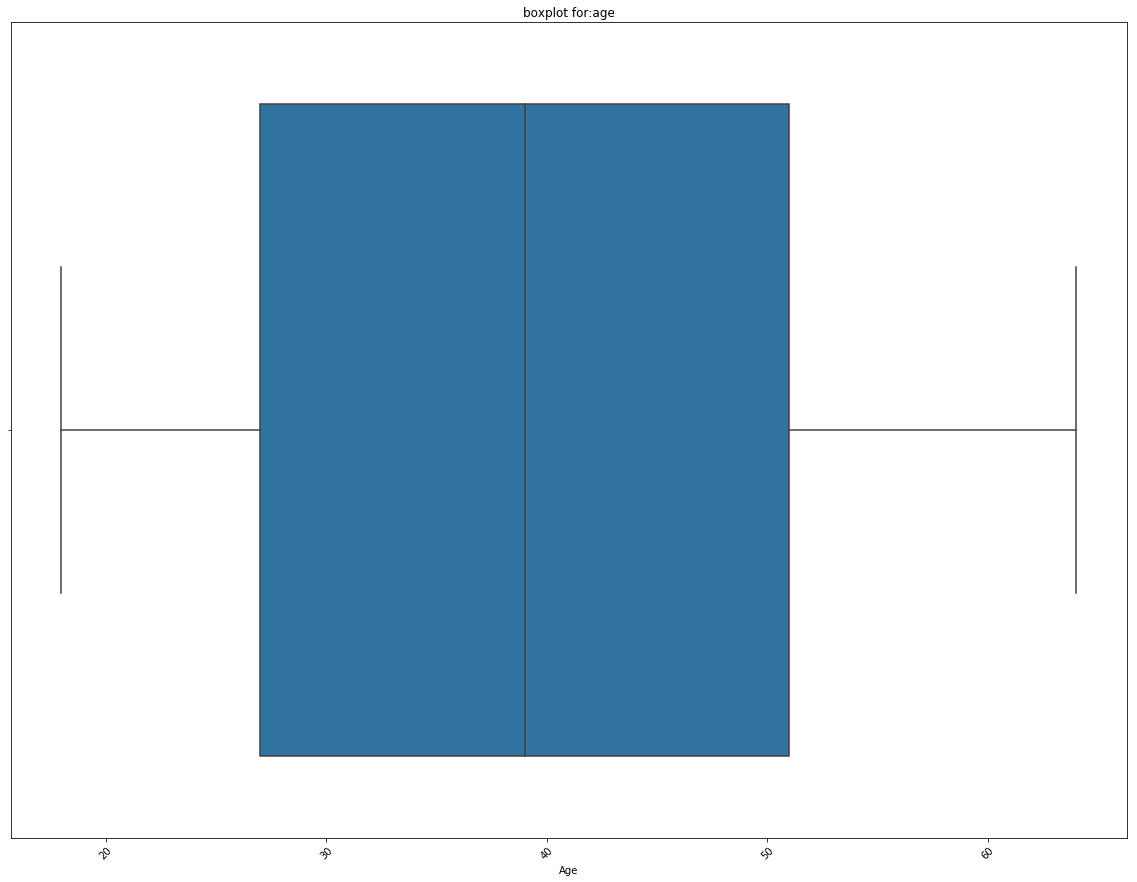

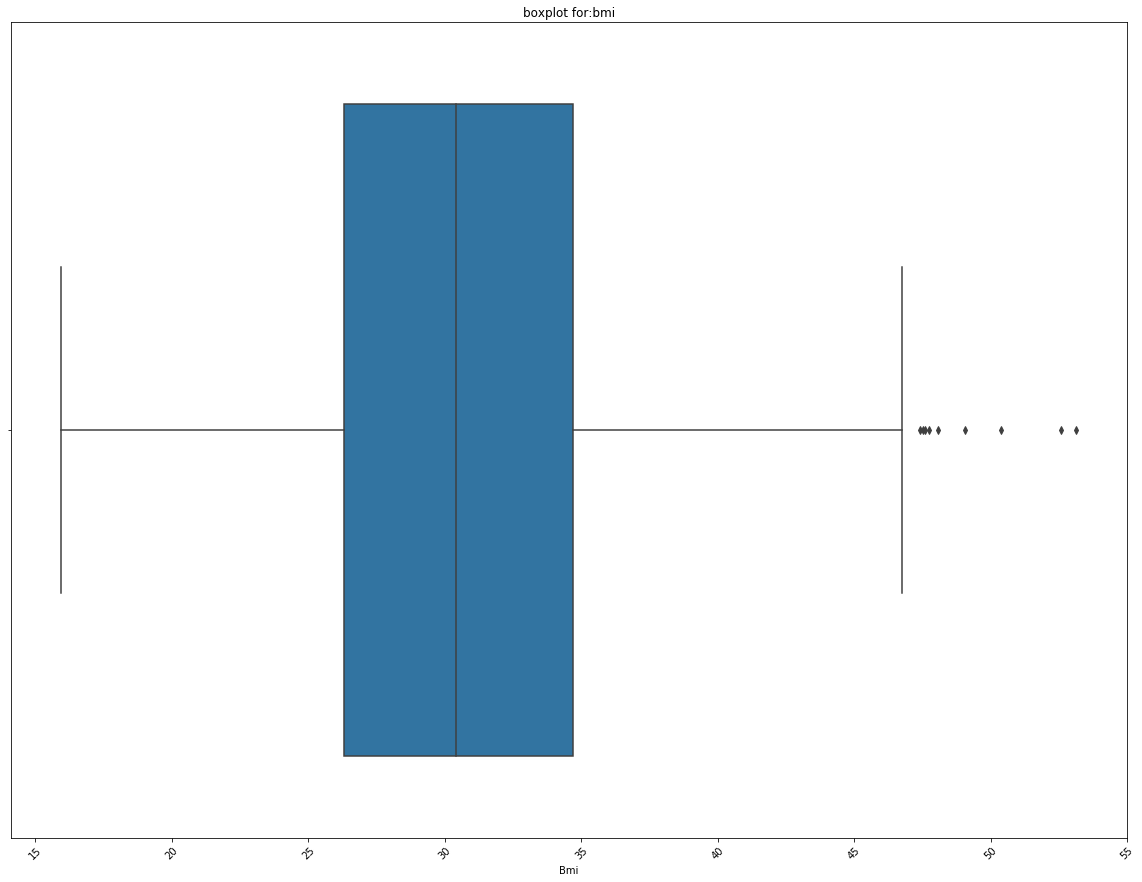

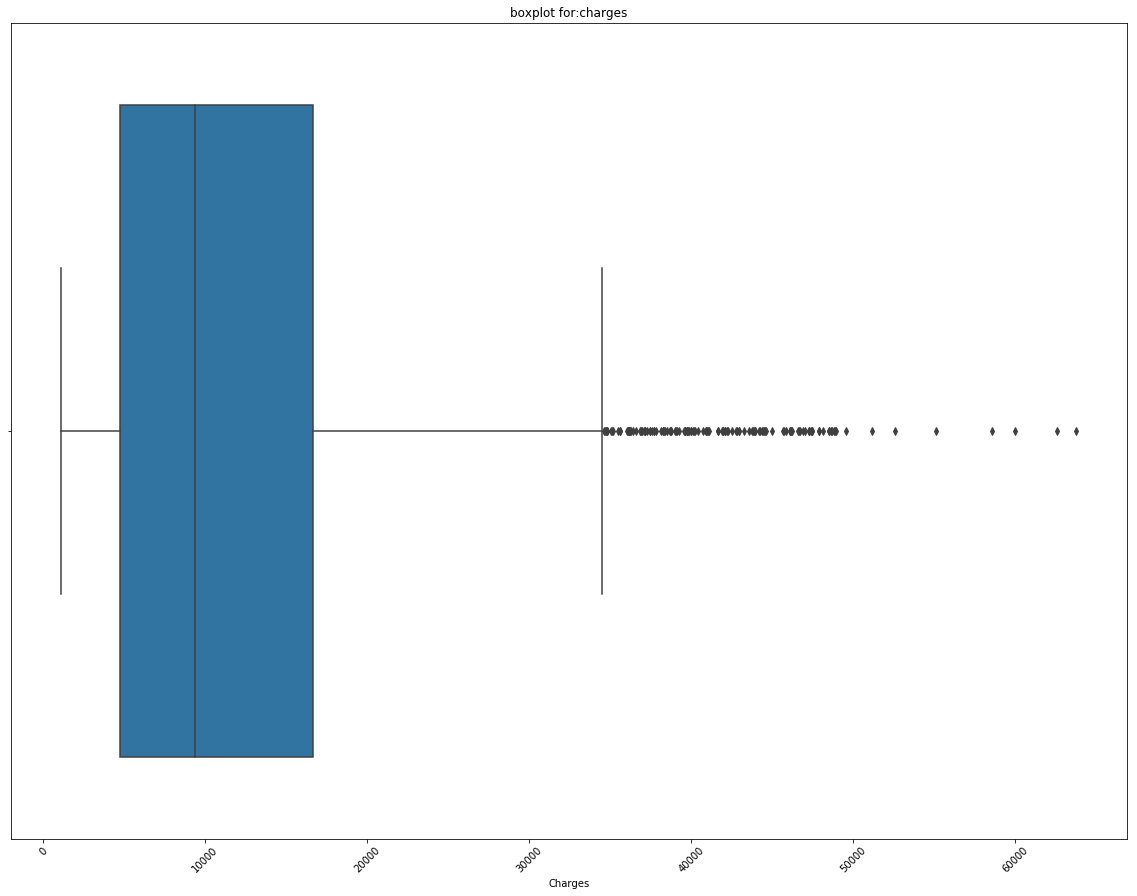

In [13]:
for num in num_cols:
    plt.figure(figsize=(20,15))
    sns.boxplot(df[num])
    plt.xlabel(num.capitalize())
    
    plt.title("boxplot for:" +num)
    plt.savefig("Boxplot/boxplot For {}.jpg".format(num.capitalize()), dpi =100, bbox_tight = True)
    plt.xticks(rotation = 45)
    
 
    

CONCLUSION: 1) age column has no outliers
            2) Bmi column has some outliers to the right of 75 percentile(Q3)
            3) Bmi column has some outliers to the right of 75 percentile(Q3)

# 3h) Distribution of categorical columns (include children) (4 marks)

In [14]:
cat_cols = df.describe(include = np.object).columns

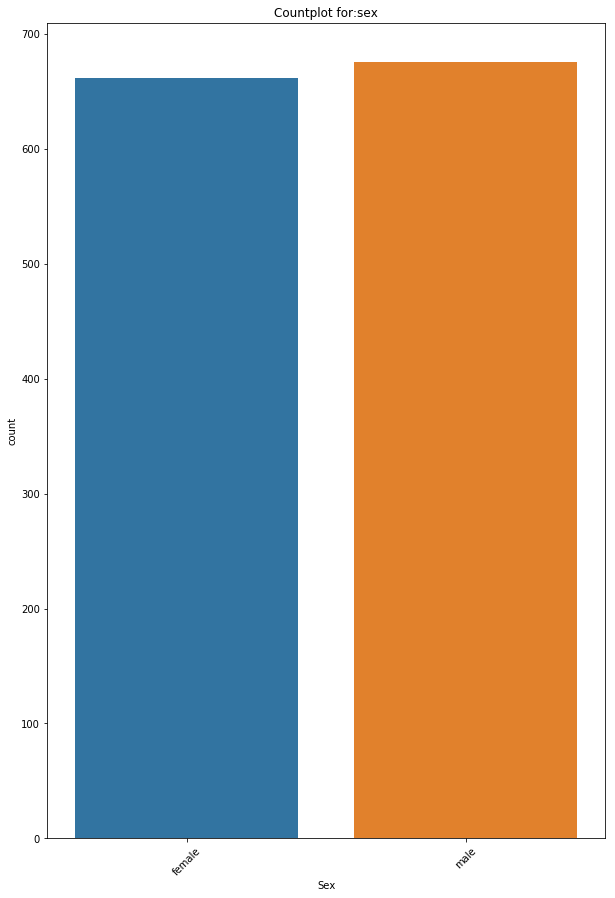

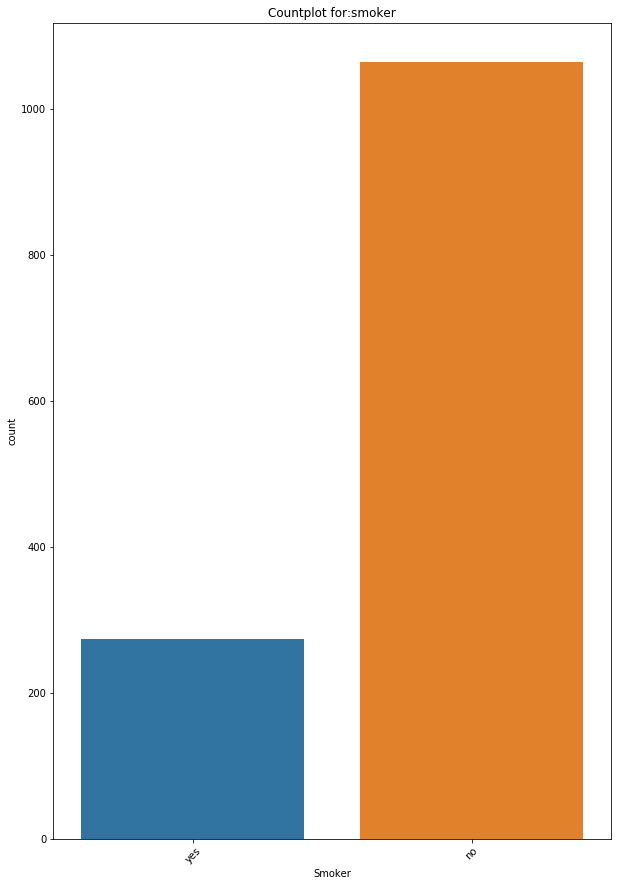

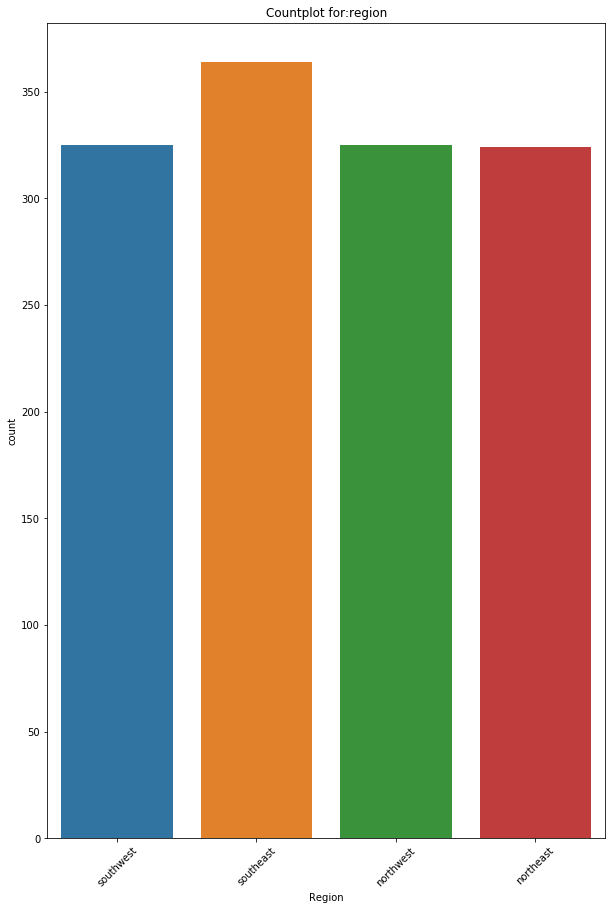

In [15]:
for col in cat_cols:
    plt.figure(figsize=(10,15))
    sns.countplot(df[col])
    plt.xlabel(col.capitalize())
    
    plt.title("Countplot for:" +col)
    plt.savefig("Countplot/countplot For {}.jpg".format(num.capitalize()), dpi =100, bbox_tight = True)
    plt.xticks(rotation = 45)
    

# 3.i) Pair plot that includes all the columns of the data frame (4 marks)

<Figure size 720x1080 with 0 Axes>

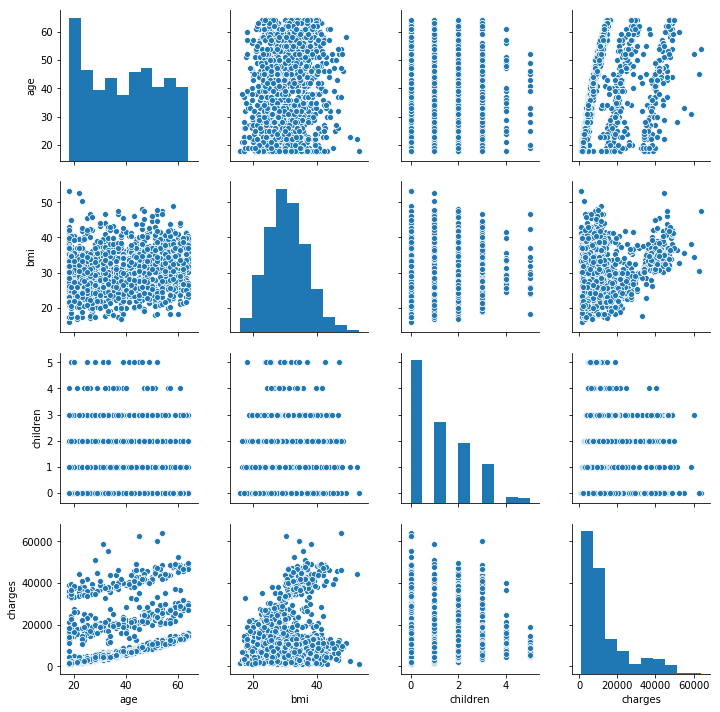

In [16]:
plt.figure(figsize = (10,15))
sns.pairplot(df, markers = 'o', kind = 'scatter')
plt.savefig("Pairplot/pairplot For Insurance.jpg", dpi =100, bbox_tight = True)

# 4.a) Do charges of people who smoke differ significantly from the people who don't? (7 marks)

In [17]:
  a=df[df['smoker']=='yes']['charges']

    

In [18]:
 smoker_charges = a[0:]

In [19]:
b = df[df['smoker']=='no']['charges']


In [20]:
len(smoker_charges)

274

In [21]:
non_smoker_charges = b[0:]


In [22]:
len(non_smoker_charges)

1064

In [23]:
t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


In [24]:
if p_value<0.05:
    print("charges of people who smoke  differ significantly from the people who don't")
else:
    print("charges of people who smoke  dont differ significantly from the people who don't")

charges of people who smoke  differ significantly from the people who don't


# 4.b) Does bmi of males differ significantly from that of females? (7 marks)

In [25]:
c=df[df['sex']=='male']['bmi']

In [26]:
male_bmi = c[0:]


In [27]:
d=df[df['sex']=='female']['bmi']


In [28]:
female_bmi = d[0:]

In [29]:
t_statistic, p_value = ttest_ind(male_bmi, female_bmi)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


In [30]:
if p_value<0.05:
    print("bmi differ")
else:
    print("bmi dont differ")

bmi dont differ


# 4c) Is the proportion of smokers significantly different in different genders? (7 marks)

In [31]:
a = df[df['smoker']=='yes']['sex'].value_counts()

In [32]:
male_smokers = a[0]

In [33]:
female_smokers = a[1]

In [34]:
n_male =df['sex'].value_counts()[0]

In [35]:
n_female = df['sex'].value_counts()[1]

In [36]:
from statsmodels.stats.proportion import proportions_ztest

In [37]:
stat, pval = proportions_ztest([female_smokers, male_smokers],[n_female, n_male])

In [38]:
stat, pval

(-2.7867402154855503, 0.005324114164320532)

In [39]:
if pval<0.05:
    print("proportion is  significantly different")
else:
    print("proportion is not significantly different")

proportion is  significantly different


# 4d) Is the distribution of bmi across women with no children, one child and two children, the same

In [40]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [56]:
bmi_women_no_child = df[(df['sex']=='female') & (df['children']==0)]['bmi']

In [57]:
bmi_women_one_child = df[(df['sex']=='female') & (df['children']==1)]['bmi']

In [58]:
bmi_women_two_child = df[(df['sex']=='female') & (df['children']==2)]['bmi']

In [70]:
df1            = pd.DataFrame({'child':0, 'bmi':bmi_women_no_child })
df2            = pd.DataFrame({'child': 1, 'bmi':bmi_women_one_child})
df3            = pd.DataFrame({'child': 2, 'bmi':bmi_women_one_child})


In [71]:
df = pd.DataFrame()

In [72]:
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)

In [73]:
df

child     bmi
0         0  27.900
5         0  25.740
9         0  25.840
11        0  26.290
13        0  39.820
20        0  36.005
26        0  23.085
31        0  26.315
40        0  26.600
47        0  34.770
48        0  24.530
50        0  35.625
64        0  22.420
65        0  28.900
68        0  36.190
70        0  24.750
78        0  39.805
79        0  32.965
81        0  38.285
86        0  31.160
87        0  27.200
88        0  27.740
89        0  26.980
90        0  39.490
100       0  31.600
102       0  30.115
113       0  35.720
118       0  27.170
122       0  28.975
125       0  28.785
...     ...     ...
1076      2  32.000
1099      2  33.990
1110      2  32.300
1123      2  32.395
1124      2  42.750
1136      2  25.000
1153      2  35.815
1160      2  34.580
1164      2  28.310
1169      2  34.105
1176      2  24.130
1177      2  27.400
1180      2  41.325
1183      2  27.360
1184      2  28.490
1188      2  25.270
1191      2  21.755
1192      2  32.395
1208      2  25.555
1214      2  31.255
1218      2  34.600
1220      2  21.945
1225      2  39.820
1239      2  42.130
1257      2  27.645
1262      2  28.050
1263      2  29.900
1287      2  25.900
1299      2  25.745
1302      2  20.800

[605 rows x 2 columns]

In [74]:
mod = ols('bmi ~ child', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
child        11.682659    1.0  0.339145  0.560541
Residual  20771.804867  603.0       NaN       NaN
